In [53]:
# importing the dependencies
import os
from os import listdir
from os.path import isfile, join
import cv2
import numpy as np
import keras
from keras import backend as k
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense

In [54]:
# a function to resize the image into appropriate dimensions
def resize(img):
    img = cv2.resize(img,(20,20))
    return img
    

In [55]:
X_train = []
y_train = []

# to get the name of the folder
for name_folder in os.listdir("extracted_letter_images") :

    name = 'extracted_letter_images/' + name_folder
    for f in listdir(name):
        # name of the folder is the name of the output
        y_train.append(np.asarray(name_folder))
        
        # constructing full path to the image
        name = 'extracted_letter_images/' + name_folder + '/' + f
        # reading the image
        image = cv2.imread(name,0)/255
        
        # appending to form the image list
        image = np.asarray(image)
        image = resize(image)
        X_train.append([image])

In [56]:
# converting the lsit into an numoy array so that it can be fed into neural network
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [57]:
X_train = np.reshape(X_train, [-1,20,20,1])

In [58]:
X_train.shape

(36761, 20, 20, 1)

In [59]:
# one hot encoding the output labels
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y_train = onehot_encoder.fit_transform(integer_encoded)

In [60]:
# defining the architecture of the model
model = Sequential()

# First convolutional layer with max pooling
model.add(Conv2D(64, (3, 3), padding="same", input_shape=(20,20,1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer with max pooling
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# third convolutional layer with max pooling
model.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Hidden layer with 100 nodes
model.add(Flatten())
model.add(Dense(100, activation="relu"))

# Output layer with 36 nodes (one for each possible letter/number we predict)
model.add(Dense(36, activation="softmax"))

# Ask Keras to build the TensorFlow model behind the scenes
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 20, 20, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 5, 512)         590336    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 512)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

In [62]:
# splitting the samples into training and testing sets so that we cross validate our results
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train ,test_size = .2)

In [63]:
# shape of the training output
y_train.shape

(29408, 36)

In [64]:
# fitting the model
history = model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          batch_size=2000, 
          epochs=5, 
          verbose=1)


Epoch 1/5
15/15 [==============================] - 42s 3s/step - loss: 3.4925 - accuracy: 0.0473 - val_loss: 3.1679 - val_accuracy: 0.3589
Epoch 2/5
15/15 [==============================] - 44s 3s/step - loss: 2.8168 - accuracy: 0.4002 - val_loss: 1.4542 - val_accuracy: 0.7290
Epoch 3/5
15/15 [==============================] - 44s 3s/step - loss: 1.0925 - accuracy: 0.7814 - val_loss: 0.4706 - val_accuracy: 0.8992
Epoch 4/5
15/15 [==============================] - 44s 3s/step - loss: 0.3752 - accuracy: 0.9201 - val_loss: 0.2316 - val_accuracy: 0.9566
Epoch 5/5
15/15 [==============================] - 46s 3s/step - loss: 0.1823 - accuracy: 0.9615 - val_loss: 0.1535 - val_accuracy: 0.9728


from the above training and testing results we can say that our model performs very well on the data set

In [65]:
#saving the model 
model.save('models/model.h5')

In [66]:
np.save('models/xtrain',X_train,allow_pickle=True)

In [67]:
#METRICS


In [68]:
from sklearn import svm
from sklearn import metrics
# sklearn metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#Accuracy
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) 

y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
accuracy_score(y_test, y_pred)


# performance
print("Classification report for %s" % model)
print(y_pred)
print(metrics.classification_report(y_test, y_pred))
print()
print("Confusion matrix")
print(metrics.confusion_matrix(y_test, y_pred))

Classification report for <tensorflow.python.keras.engine.sequential.Sequential object at 0x7feefcc71bb0>
[35  4 21 ...  9  6 28]
              precision    recall  f1-score   support

           0       0.21      0.98      0.34        59
           1       1.00      0.78      0.88        32
           2       1.00      0.98      0.99       249
           3       0.99      0.97      0.98       259
           4       0.99      0.93      0.96       254
           5       1.00      0.95      0.97       275
           6       0.98      0.96      0.97       239
           7       0.98      0.96      0.97       253
           8       1.00      0.95      0.97       281
           9       1.00      0.93      0.96       304
          10       1.00      0.93      0.96       184
          11       0.99      0.94      0.96       147
          12       0.99      0.93      0.96       143
          13       0.99      0.92      0.95       143
          14       1.00      0.98      0.99       130
     

/home/dev/PycharmProjects/NLP/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dev/PycharmProjects/NLP/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dev/PycharmProjects/NLP/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

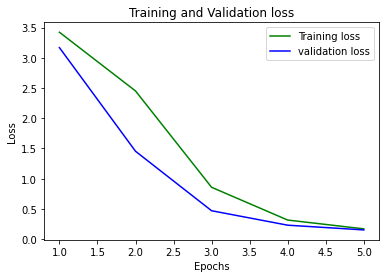

In [73]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, 6)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

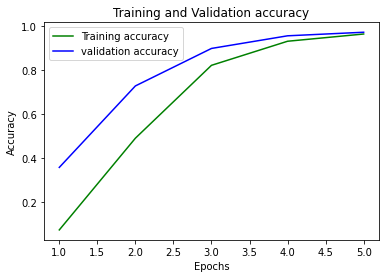

In [75]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()